In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.model_selection import train_test_split

In [119]:
df = pd.read_csv(r"C:\Users\HP\Downloads\laptops.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [120]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [121]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [122]:
n_df = df.drop(['laptop', 'status', 'brand', 'model','cpu',  'storage_type', 'gpu', 'touch'], axis = 1)
n_df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


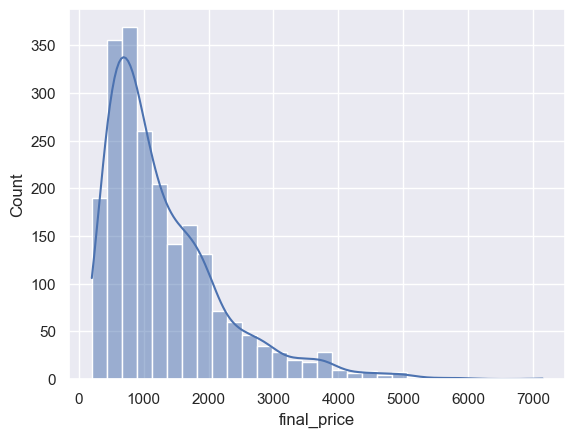

In [123]:
sns.histplot(n_df['final_price'], bins=30, kde=True)
plt.show()

In [124]:
n_df.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [125]:
# Filling the NaN values in 'Parking Spaces' with 0
n_df['screen'] = n_df['screen'].fillna(0)

# Filling the NaN values in 'screen' with mean
n_df['screen'] = n_df['screen'].fillna(n_df['screen'].mean())

In [127]:
n_df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2160.000000,2160.000000
mean,15.413889,596.294444,15.140023,1312.638509
std,9.867815,361.220506,1.367766,911.475417
min,4.000000,0.000000,0.000000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [469]:
n = len(n_df)

#n_val = int(n * 0.2)
n_test = int(n * 0.4)
n_train = n - n_test

In [471]:
#n_val, 
n_test, n_train

(864, 1296)

In [472]:
idx = np.arange(n)

In [474]:
np.random.seed(9)
np.random.shuffle(idx)

In [476]:
df_train = n_df.iloc[idx[:n_train]]
#df_val = n_df.iloc[idx[n_train:n_train+n_val]]
df_test = n_df.iloc[idx[n_train:]]

In [479]:
df_train = df_train.reset_index(drop=True)
#df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [481]:
y_train = np.log1p(df_train.final_price.values)
#y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [483]:
y_train

array([7.37393285, 7.20785987, 6.30991828, ..., 6.06380846, 7.37775891,
       8.51719519])

In [485]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [431]:
lr = LinearRegression()
lr.fit(df_train, y_train)
lr_val = lr.predict(df_val)

In [435]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_val, lr_val) 
rmse = np.sqrt(mse)
rmse_rounded = round(rmse, 2)
rmse_rounded

0.23

In [437]:
scores = [0.23, 0.23, 0.24, 0.22, 0.22, 0.23, 0.23, 0.23,0.24, 0.26]
std = np.std(scores)
std

0.011

### LASSO

In [487]:
lasso = Lasso(alpha=0.001)
lasso.fit(df_train, y_train)
lasso_test = lasso.predict(df_test)

In [489]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lasso_test) 
rmse = np.sqrt(mse)
rmse_rounded = round(rmse, 2)
rmse_rounded

0.26

In [491]:
std = np.std(rmse_rounded)
std

0.0